In [1]:
%matplotlib widget

In [16]:
import nrrd
import numpy as np
from skimage.metrics import structural_similarity as compare_ssim

# Load the NRRD volumes
volume1, _ = nrrd.read(r'/home/jericho/Documents/2 CT - 4 frames Volume Sequence by SeriesTime 0.nrrd')
volume2, _ = nrrd.read(r'/home/jericho/Documents/ct_data_segmentations/3 Pelvis-Supine.nrrd')
volume3, _ = nrrd.read(r'/home/jericho/Documents/ct_data_segmentations/4 Pelvis-Supine.nrrd')
volume4, _ = nrrd.read(r'/home/jericho/Documents/ct_data_segmentations/5 Pelvis-Supine.nrrd')



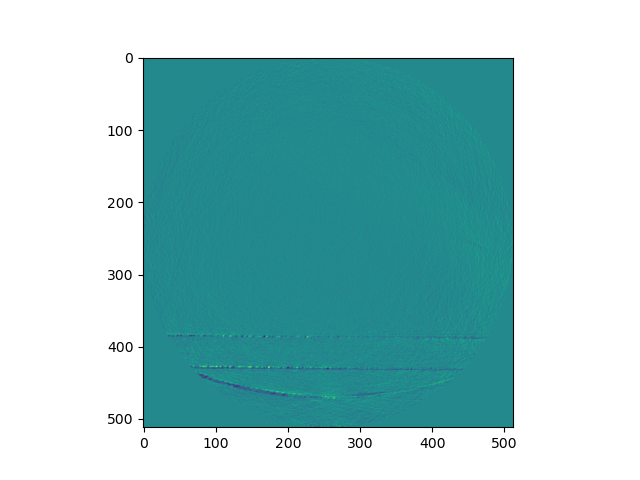

In [18]:
import matplotlib.pyplot as plt
import mpl_interactions as pli

# Create the figure and the line that we will manipulate
plt.figure()
pli.hyperslicer(volume4.T - volume1.T)


In [22]:
CT_1 = volume1.T[80:150, 200:350, 200:300] + 1000
CT_2 = volume2.T[80:150, 200:350, 200:300] + 1000
CT_3 = volume3.T[80:150, 200:350, 200:300] + 1000
CT_4 = volume4.T[80:150, 200:350, 200:300] + 1000

CT_1[CT_1 < 0] = 0
CT_1[CT_1 > 2000] = 2000

CT_2[CT_2 < 0] = 0
CT_2[CT_2 > 2000] = 2000

CT_3[CT_3 < 0] = 0
CT_3[CT_3 > 2000] = 2000

CT_4[CT_4 < 0] = 0
CT_4[CT_4 > 2000] = 2000

# Compute the SSIM for the segmentation structure in the images
ssim1 = compare_ssim(CT_4, CT_2,gaussian_weights=True, sigma=1.5, use_sample_covariance=False, data_range=2000)
ssim2 = compare_ssim(CT_4, CT_3,gaussian_weights=True, sigma=1.5, use_sample_covariance=False, data_range=2000)
ssim3 = compare_ssim(CT_4, CT_1,gaussian_weights=True, sigma=1.5, use_sample_covariance=False, data_range=2000)

print(f'SSIM for volume1: {ssim1}')
print(f'SSIM for volume2: {ssim2}')
print(f'SSIM for volume3: {ssim3}')

SSIM for volume1: 0.6926885547175503
SSIM for volume2: 0.7399479843338116
SSIM for volume3: 0.7548170059668131


In [8]:
compare_ssim?

Signature:
compare_ssim(
    im1,
    im2,
    *,
    win_size=None,
    gradient=False,
    data_range=None,
    channel_axis=None,
    gaussian_weights=False,
    full=False,
    **kwargs,
)
Docstring:
Compute the mean structural similarity index between two images.
Please pay attention to the `data_range` parameter with floating-point images.

Parameters
----------
im1, im2 : ndarray
    Images. Any dimensionality with same shape.
win_size : int or None, optional
    The side-length of the sliding window used in comparison. Must be an
    odd value. If `gaussian_weights` is True, this is ignored and the
    window size will depend on `sigma`.
gradient : bool, optional
    If True, also return the gradient with respect to im2.
data_range : float, optional
    The data range of the input image (distance between minimum and
    maximum possible values). By default, this is estimated from the image
    data type. This estimate may be wrong for floating-point image data.
    Therefore it